# Master EDA (In Progress)

## Overall Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Exploring FSIS Data

### Import Data

In [3]:
FSIS_DATA = "/Users/abby/Desktop/RAFI/data/fsis-processors-with-location.csv"
df_FSIS = pd.read_csv(FSIS_DATA)
df_FSIS.head(2)

,Unnamed: 0,EstNumber,EstID,Parent Corporation,Establishment Name,State,Size,Animals Processed,Processed\nVolume\nCategory,Slaughter\nVolume\nCategory,Full Address,latitude,longitude
0,0,M267,4802,JBS,JBS Tolleson Inc.,AZ,Large,Beef,5.0,4.0,"651 S. 91st Ave, Tolleson, AZ 85353",33.441660,-112.252559
1,1,M354,5117,Cargill,Cargill Meat Solutions,CA,Large,Beef,5.0,4.0,"3115 S. Fig Ave., Fresno, CA 93706",36.689651,-119.801950


### What animals are processed by these plants?

In [4]:
df_FSIS["Animals Processed"].value_counts()

Beef,Pork,Sheep/Lamb                   420
Chicken                                184
Beef                                   141
Pork                                   107
Beef,Pork                               92
Beef,Sheep/Lamb                         66
Turkey                                  39
Chicken,Turkey                          29
Turkey,Chicken                          21
Sheep/Lamb                              17
Beef,Pork,Chicken,Turkey,Sheep/Lamb     11
Beef,Pork,Sheep/Lamb,Chicken,Turkey      5
Sheep/Lamb,Pork                          5
Beef,Pork,Chicken,Turkey                 3
Pork,Sheep/Lamb                          3
Beef,Pork,Sheep/Lamb,Chicken             2
Beef,Chicken,Turkey                      1
Pork,Turkey                              1
Sheep/Lamb,Pork,Chicken,Turkey           1
Beef,Sheep/Lamb,Chicken,Turkey           1
Name: Animals Processed, dtype: int64

In [5]:
animals = ["Beef", "Pork", "Sheep/Lamb", "Chicken", "Turkey"]
distrib = {}

for animal in animals:
    df_FSIS[animal] = df_FSIS['Animals Processed'].str.contains(animal).astype(int)
    distrib[animal] = sum(df_FSIS[animal])

print("The total number of plants that process this animal are:")
print(distrib)

The total number of plants that process this animal are:
{'Beef': 742, 'Pork': 650, 'Sheep/Lamb': 531, 'Chicken': 258, 'Turkey': 112}


### What size are the plants in this dataset?

In [6]:
df_FSIS["Size"].value_counts()

Very Small    630
Small         289
Large         230
Name: Size, dtype: int64

### Cross-reference animal types by plant size/farm location

In [7]:
df_FSIS.pivot_table(values=animals, index="Size", aggfunc="sum")

,Beef,Chicken,Pork,Sheep/Lamb,Turkey
Size,,,,,
Large,41,138,31,0,22
Small,156,61,144,99,36
Very Small,545,59,475,432,54


In [8]:
df_FSIS.pivot_table(values=animals, index="State", aggfunc="sum")

,Beef,Chicken,Pork,Sheep/Lamb,Turkey
State,,,,,
AK,3,0,3,3,0
AL,7,19,7,6,1
AR,7,21,5,5,5
AZ,5,0,2,2,0
CA,29,12,17,17,7
CO,25,1,19,19,0
CT,5,0,3,4,0
DE,1,5,1,1,0
FL,19,2,13,13,1


### Who owns these plants?

In [9]:
df_FSIS["Parent Corporation"].value_counts()

Independent                    914
Tyson                           51
JBS                             35
Cargill                         29
Smithfield                      13
Perdue                          12
Cooperative/Farmer-Owned        12
Koch Foods                       9
Foster Farms                     6
Peco Foods                       6
Hormel                           5
George's                         5
Pilgrim's Pride                  4
Case Farms                       4
Mountaire                        4
House of Raeford                 4
Mar-Jac                          3
American Foods Group             3
Marfig                           3
Amick                            3
Clemens Food Group               2
Farbest                          2
Sechler Family Foods, Inc.       2
Fieldale Farms Corporation       2
Seaboard                         2
Central Valley Meat Company      2
Simmons Foods                    2
Bachoco                          2
Prestage            

33

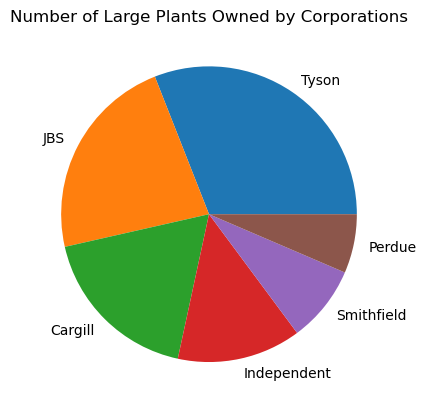

In [10]:
# Number of large plants but shows only Corps who have 10 or more
df_large = df_FSIS[df_FSIS["Size"] == "Large"]
large_plant_corps = df_large["Parent Corporation"].value_counts()
large_plant_corps[large_plant_corps >= 10].plot(kind="pie", title="Number of Large Plants Owned by Corporations", ylabel="")

len(large_plant_corps)

<AxesSubplot: title={'center': 'Number of Large Plants by State'}, ylabel='Count'>

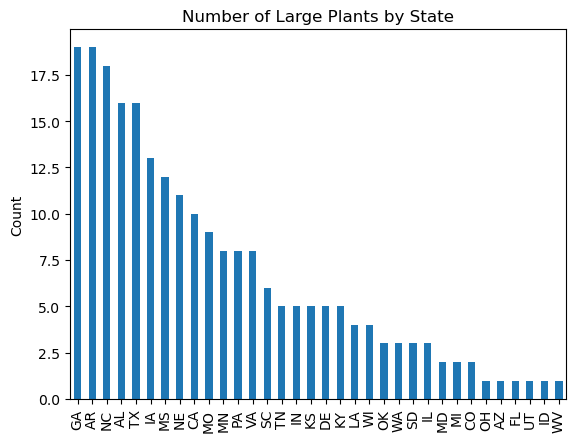

In [11]:
df_large["State"].value_counts().plot(kind="bar", title="Number of Large Plants by State", ylabel="Count")

#### Large Tyson Plants

<AxesSubplot: title={'center': 'Large Tyson Chicken Processing Plants by State'}, ylabel='Count'>

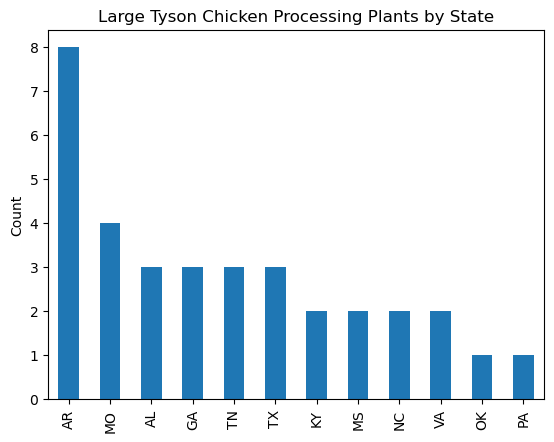

In [12]:
df_tyson = df_large[(df_large["Parent Corporation"] == "Tyson")]
df_tyson_chicken = df_tyson[(df_tyson["Animals Processed"] == "Chicken")]
df_tyson_chicken["State"].value_counts().plot(kind="bar", title="Large Tyson Chicken Processing Plants by State", ylabel="Count")

#### Large JBS Plants

<AxesSubplot: title={'center': 'Large JBS Chicken Processing Plants by State'}, ylabel='Count'>

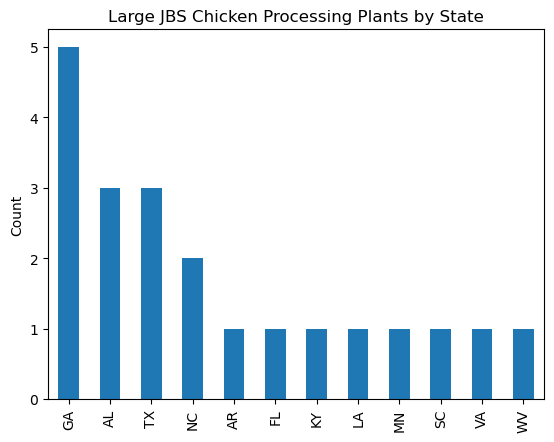

In [13]:
df_JBS = df_large[(df_large["Parent Corporation"] == "JBS")]
df_JBS_chicken = df_JBS[(df_JBS["Animals Processed"] == "Chicken")]
df_JBS_chicken["State"].value_counts().plot(kind="bar", title="Large JBS Chicken Processing Plants by State", ylabel="Count")

## Exploring 1997-2022 Infogroup Data

### Import Data

In [14]:
df_IG = pd.read_csv("/Users/abby/Desktop/RAFI/1997-2022_poultry_plants.csv")
df_IG.head(2)

/var/folders/ly/2syhzlz16r73t4fqm0kkkz2h0000gn/T/ipykernel_813/903647571.py:1: DtypeWarning: Columns (32,56,57,62,63,65,67,70,76,77,78,79,82,83,84,87,88,89,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df_IG = pd.read_csv("/Users/abby/Desktop/RAFI/1997-2022_poultry_plants.csv")


,Unnamed: 0.1,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,UNNAMED: 0,FIRST NAME,LAST NAME,PHONE NUMBER,FAX AREA CODE,FAX PHONE NUMBER,PROFESSIONAL TITLE,TITLE CODE,GENDER,EMPLOYEE SIZE (6) - CORPORATE,MODELED EMPLOYEE SIZE,SALES VOLUME (9) - CORPORATE,CALL STATUS CODE,NAME STANDARIZATION FLAG,SQUARE FOOTAGE,AD SIZE CODE,BOOK NUMBER,ARCHIVE VERSION MONTH,NEW ADD DATE,TELERESEARCH UPDATE DATE,YEAR 1ST APPEARED,LOCATION NAME,LANDMARK ADDRESS,LANDMARK CITY,LANDMARK STATE,LANDMARK ZIPCODE,LANDMARK ZIP4,MAILING ADDRESS,MAILING CITY,MAILING STATE,MAILING ZIPCODE,MAILING ZIP4,MAILING ADDRESS FLAG,UNIT NUMBER,UNIT TYPE,NAICS CODE,PROFESSIONAL SIC FLAG,SIC6_DESCRIPTIONS (PRIMARYSIC)
0,0,11380.0,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346.0,9311.0,159.0,662.0,2.0,I,I,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,25401.0,POULTRY FARMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,67803.0,1025.0,278505.0,9.0,NaN,NaN,NaN,NaN,737560971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,950200.0,4.0,33.011665,-89.126923,P,0.0,NaN,0.0,28159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,21772.0,TYSON FOODS INC,47283 SD HIGHWAY 34,COLMAN,SD,57017.0,6543.0,101.0,605.0,2.0,A,A,201104.0,MEAT PRODUCTS (MFRS),31161103.0,ANIMAL (EXCEPT POULTRY) SLAUGHTERING,515403.0,LIVESTOCK-DEALERS (WHLS),25401.0,POULTRY FARMS,201501.0,POULTRY PROCESSING PLANTS (MFRS),204803.0,FEED-MANUFACTURERS,207702.0,RENDERING COMPANIES (MFRS),2022,NaN,1.0,319.0,2.0,NaN,NaN,NaN,NaN,303413538,NaN,7537913.0,1850.0,NaN,I,NaN,NaN,NaN,3.0,959600.0,2.0,43.978463,-96.753100,P,0.0,NaN,0.0,46101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What's in this dataframe?

In [15]:
df_IG.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'COMPANY', 'ADDRESS LINE 1', 'CITY',
       'STATE', 'ZIPCODE', 'ZIP4', 'COUNTY CODE', 'AREA CODE', 'IDCODE',
       'LOCATION EMPLOYEE SIZE CODE', 'LOCATION SALES VOLUME CODE',
       'PRIMARY SIC CODE', 'SIC6_DESCRIPTIONS', 'PRIMARY NAICS CODE',
       'NAICS8 DESCRIPTIONS', 'SIC CODE', 'SIC6_DESCRIPTIONS (SIC)',
       'SIC CODE 1', 'SIC6_DESCRIPTIONS (SIC1)', 'SIC CODE 2',
       'SIC6_DESCRIPTIONS(SIC2)', 'SIC CODE 3', 'SIC6_DESCRIPTIONS(SIC3)',
       'SIC CODE 4', 'SIC6_DESCRIPTIONS(SIC4)', 'ARCHIVE VERSION YEAR',
       'YELLOW PAGE CODE', 'EMPLOYEE SIZE (5) - LOCATION',
       'SALES VOLUME (9) - LOCATION', 'BUSINESS STATUS CODE',
       'INDUSTRY SPECIFIC FIRST BYTE', 'YEAR ESTABLISHED', 'OFFICE SIZE CODE',
       'COMPANY HOLDING STATUS', 'ABI', 'SUBSIDIARY NUMBER', 'PARENT NUMBER',
       'PARENT ACTUAL EMPLOYEE SIZE', 'PARENT ACTUAL SALES VOLUME',
       'PARENT EMPLOYEE SIZE CODE', 'PARENT SALES VOLUME CODE', 'SITE NUMBER',
       'ADD

### How many businesses are repeated across years?

In [16]:
unique_biz = df_IG.drop_duplicates(subset=['ABI'])
print("There are", len(unique_biz), "businesses with unique ABI codes within this dataframe")

There are 2168 businesses with unique ABI codes within this dataframe


In [17]:
unique_biz.groupby('STATE').count()['Unnamed: 0.1'].sort_values(ascending=False)

STATE
AR    208
GA    177
TX    168
AL    137
NC    125
CA    113
MS     96
MN     89
MO     72
OH     70
PA     63
IA     54
VA     52
OK     49
NY     49
IN     46
SC     41
TN     40
IL     39
WI     38
FL     36
NE     36
MI     34
MD     33
LA     32
KY     31
CO     27
NJ     25
DE     25
KS     19
SD     19
MA     15
WA     14
ME     13
UT     12
OR     11
HI     10
NH      8
ID      8
WV      6
RI      5
CT      5
AZ      5
ND      4
DC      2
VT      2
AK      2
NV      1
NM      1
MT      1
Name: Unnamed: 0.1, dtype: int64

### Do columns with similar names include the same data?

In [18]:
unique_biz['PRIMARY NAICS CODE'].equals(unique_biz['NAICS CODE'])

False

In [19]:
unique_biz['YEAR ESTABLISHED'].value_counts()

1935.0    28
1970.0    20
1925.0    19
1989.0    17
2002.0    17
          ..
2020.0     1
2022.0     1
1858.0     1
1913.0     1
1916.0     1
Name: YEAR ESTABLISHED, Length: 117, dtype: int64

In [20]:
unique_biz['YEAR 1ST APPEARED'].value_counts()

2018.0    5
2019.0    4
2016.0    3
2012.0    3
2011.0    2
2000.0    2
2017.0    2
2003.0    2
2008.0    2
2007.0    1
2010.0    1
2013.0    1
1995.0    1
1987.0    1
2006.0    1
2015.0    1
1984.0    1
2001.0    1
2014.0    1
1989.0    1
1997.0    1
2002.0    1
Name: YEAR 1ST APPEARED, dtype: int64

### What columns might be useful to us?

In [21]:
# "Indicates if company is a public company, private company, or a branch"
unique_biz['COMPANY HOLDING STATUS'].unique()

array([nan,  1.,  0.,  2.])

In [22]:
unique_biz["ARCHIVE VERSION YEAR"].value_counts().reset_index().sort_values(by='index', ascending=False).reset_index(drop=True)

,index,ARCHIVE VERSION YEAR
0,2022,720
1,2021,38
2,2020,40
3,2019,65
4,2018,61
5,2017,82
6,2016,45
7,2015,46
8,2014,64
9,2013,36


In [36]:
# "Identifies corporate parent of the business and also serves as the ABI number for HQ"
unique_biz['PARENT NUMBER'].astype(str).value_counts().head(20)

## IN ORDER: independent, Tyson, independent, JBS, Hormel, Cargil
#### Foster, Sanderson, Koch, Mountaire, Perdue, Continental Grain,
#### House of Raeford, Pilgrim's Pride, George's Inc, Cal-main Foods,
#### Conagra Brands, Simmons Foods, Peco Foods, NOT IN DATABASE


nan            972
7537913.0      334
0.0            155
987289857.0    130
7516065.0       47
453614844.0     45
9564816.0       38
441416815.0     38
517549762.0     36
835874538.0     33
7529217.0       31
433353331.0     29
513523.0        25
436136139.0     25
512392.0        22
431481290.0     20
7509045.0       13
7534076.0       12
531052413.0     11
1941509.0       11
Name: PARENT NUMBER, dtype: int64

#### Using ABI to track businesses across years

##### I.E. ABI 512247248

In [24]:
ex_ABI = df_IG.loc[df_IG.ABI == 512247248].reset_index(drop=True)
ex_ABI

,Unnamed: 0.1,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,UNNAMED: 0,FIRST NAME,LAST NAME,PHONE NUMBER,FAX AREA CODE,FAX PHONE NUMBER,PROFESSIONAL TITLE,TITLE CODE,GENDER,EMPLOYEE SIZE (6) - CORPORATE,MODELED EMPLOYEE SIZE,SALES VOLUME (9) - CORPORATE,CALL STATUS CODE,NAME STANDARIZATION FLAG,SQUARE FOOTAGE,AD SIZE CODE,BOOK NUMBER,ARCHIVE VERSION MONTH,NEW ADD DATE,TELERESEARCH UPDATE DATE,YEAR 1ST APPEARED,LOCATION NAME,LANDMARK ADDRESS,LANDMARK CITY,LANDMARK STATE,LANDMARK ZIPCODE,LANDMARK ZIP4,MAILING ADDRESS,MAILING CITY,MAILING STATE,MAILING ZIPCODE,MAILING ZIP4,MAILING ADDRESS FLAG,UNIT NUMBER,UNIT TYPE,NAICS CODE,PROFESSIONAL SIC FLAG,SIC6_DESCRIPTIONS (PRIMARYSIC)
0,2,21912.0,SIMMONS FOODS INC,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,6027.0,33.0,479.0,2.0,H,H,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,600.0,95134.0,2.0,NaN,NaN,NaN,NaN,512247248,NaN,7534076.0,100.0,1401863.0,F,K,NaN,NaN,7.0,20501.0,2.0,35.428061,-94.336725,P,22900.0,2.0,0.0,5033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1045,NaN,SIMMONS FOODS INC,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,6027.0,33.0,479.0,2.0,H,H,201501.0,NaN,31161501.0,POULTRY PROCESSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN,600.0,95134.0,2.0,NaN,NaN,NaN,NaN,512247248,NaN,7534076.0,100.0,1232440.0,F,K,NaN,NaN,7.0,20501.0,2.0,35.428061,-94.336725,P,22900.0,2.0,0.0,5033.0,5479275.0,KAMERON,SLATER,4103035.0,NaN,NaN,NaN,K,M,NaN,A,NaN,M,9.0,8.0,NaN,NaN,7.0,199910.0,202006.0,1999.0,SIMMONS FOODS INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POULTRY PROCESSING PLANTS (MFRS)
2,1507,NaN,SIMMONS FOODS INC,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,6027.0,33.0,479.0,2.0,H,H,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,600.0,95134.0,2.0,NaN,NaN,NaN,NaN,512247248,NaN,7534076.0,100.0,3675689.0,F,K,NaN,NaN,7.0,20501.0,2.0,35.428061,-94.336725,P,22900.0,2.0,0.0,5033.0,373131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2650,NaN,SIMMONS FOODS INC,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,6027.0,33.0,479.0,2.0,H,H,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,541104.0,FOOD PRODUCTS-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,600.0,95134.0,2.0,NaN,NaN,NaN,NaN,512247248,NaN,7534076.0,100.0,1634130.0,F,K,NaN,NaN,7.0,20501.0,2.0,35.428061,-94.336725,P,22900.0,2.0,0.0,5033.0,10374726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3322,NaN,SIMMONS FOODS INC,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,6027.0,33.0,479.0,2.0,H,H,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,541104.0,FOOD PRODUCTS-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,600.0,95134.0,2.0,NaN,NaN,NaN,NaN,512247248,NaN,7534076.0,100.0,1568259.0,F,K,NaN,NaN,7.0,20501.0,2.0

In [25]:
df_IG['ABI'].value_counts().sort_values(ascending=False)
#Some businesses appear across all 26 years

886755743    26
4704185      26
1081025      26
9489527      26
1975044      26
             ..
452230816     1
403317225     1
8854671       1
417108974     1
503201196     1
Name: ABI, Length: 2168, dtype: int64

#### Grouping by ABI and Parent Number

##### Could be used to see if smaller plants were bought over time

In [26]:
ABI_and_parent = df_IG.groupby('ABI')['PARENT NUMBER'].apply(list).reset_index()
ABI_and_parent

,ABI,PARENT NUMBER
0,2006,"[441297108.0, 441297108.0, 430175422.0, 430175..."
1,2055,"[nan, nan, nan, nan, 0.0, nan]"
2,15495,"[nan, 517549762.0, 517549762.0, 517549762.0, 5..."
3,15503,[7506140.0]
4,17947,"[0.0, nan]"
...,...,...
2163,997248679,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2164,997432166,"[nan, nan]"
2165,998302269,"[0.0, 0.0]"
2166,998670129,"[0.0, 0.0]"


In [27]:
two = pd.read_csv("/Users/abby/Desktop/2022.csv")

In [28]:
two.loc[two['ABI'] == 7537913]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
7849218,7849218,TYSON FOODS INC,2200 W DON TYSON PKWY,SPRINGDALE,AR,72762.0,6901.0,143.0,479,2,I,NaN,201501,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,874213.0,MARKETING PROGRAMS & SERVICES,19101.0,FARMS,422201.0,LOCKER PLANTS,209903.0,FOOD PRODUCTS & MANUFACTURERS,201101.0,MEAT PACKERS (MFRS),2022,NaN,1850.0,0.0,1,NaN,1935.0,NaN,1.0,7537913,NaN,7537913.0,1850.0,NaN,I,NaN,7537913.0,NaN,7,10403.0,2.0,36.154021,-94.154599,P,22220.0,2.0,0.0,5143.0


In [29]:
two.loc[two['ABI'] == 987289857]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
5237907,5237907,JBS USA,1770 PROMONTORY CIR,GREELEY,CO,80634.0,9039.0,123.0,970,2,H,NaN,201101,MEAT PACKERS (MFRS),31161102.0,ANIMAL (EXCEPT POULTRY) SLAUGHTERING,874213.0,MARKETING PROGRAMS & SERVICES,201104.0,MEAT PRODUCTS (MFRS),999966.0,FEDERAL GOVERNMENT CONTRACTORS,542107.0,MEAT-RETAIL,NaN,NaN,2022,NaN,500.0,0.0,1,NaN,2002.0,NaN,NaN,987289857,NaN,987289857.0,500.0,NaN,H,NaN,987289857.0,NaN,8,2101.0,4.0,40.411168,-104.855864,P,24540.0,2.0,216.0,8123.0


In [31]:
two.loc[two['ABI'] == 7516065]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
11281273,11281273,HORMEL FOODS CORP,1 HORMEL PL,AUSTIN,MN,55912.0,3680.0,99.0,507,2,I,NaN,209903,FOOD PRODUCTS & MANUFACTURERS,31199906.0,ALL OTHER MISCELLANEOUS FOOD MANUFACTURING,514101.0,FOOD PRODUCTS (WHLS),874213.0,MARKETING PROGRAMS & SERVICES,515401.0,LIVESTOCK BUYERS (WHLS),201101.0,MEAT PACKERS (MFRS),999966.0,FEDERAL GOVERNMENT CONTRACTORS,2022,NaN,1000.0,0.0,1,NaN,1891.0,NaN,1.0,7516065,NaN,7516065.0,1000.0,NaN,I,NaN,7516065.0,NaN,7,100.0,1.0,43.681528,-92.967875,0,12380.0,1.0,462.0,27099.0


In [34]:
two.loc[two['ABI'] == 453614844]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
15842222,15842222,CARGILL INC,15407 MCGINTY RD W,WAYZATA,MN,55391.0,2399.0,53.0,952,2,I,NaN,209903,FOOD PRODUCTS & MANUFACTURERS,31199906.0,ALL OTHER MISCELLANEOUS FOOD MANUFACTURING,737109.0,INFORMATION TECHNOLOGY SERVICES,874213.0,MARKETING PROGRAMS & SERVICES,422101.0,GRAIN ELEVATORS,872103.0,BILLING SERVICE,679998.0,VENTURE CAPITAL COMPANIES,2022,NaN,3000.0,0.0,1,NaN,1865.0,NaN,NaN,453614844,NaN,453614844.0,3000.0,22447280.0,I,K,453614844.0,NaN,6,26301.0,1.0,44.952336,-93.479931,P,33460.0,2.0,378.0,27053.0


In [37]:
two.loc[two['ABI'] == 9564816]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
10903107,10903107,FOSTER FARMS,1000 DAVIS ST,LIVINGSTON,CA,95334.0,1526.0,47.0,209,2,E,NaN,25401,POULTRY FARMS,11234001.0,POULTRY HATCHERIES,514404.0,POULTRY-WHOLESALE,999966.0,FEDERAL GOVERNMENT CONTRACTORS,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,50.0,0.0,1,NaN,1939.0,NaN,NaN,9564816,NaN,9564816.0,50.0,1800000.0,E,K,9564816.0,NaN,6,301.0,1.0,37.390186,-120.724886,P,32900.0,2.0,488.0,6047.0


In [38]:
two.loc[two['ABI'] == 441416815]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
83903,83903,SANDERSON FARMS INC,127 FLYNT RD,LAUREL,MS,39443.0,9062.0,67.0,601,2,F,NaN,201501,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,514404.0,POULTRY-WHOLESALE,874213.0,MARKETING PROGRAMS & SERVICES,999966.0,FEDERAL GOVERNMENT CONTRACTORS,NaN,NaN,NaN,NaN,2022,NaN,200.0,0.0,1,NaN,1947.0,NaN,1.0,441416815,NaN,441416815.0,200.0,4799653.0,F,J,NaN,NaN,7,950401.0,2.0,31.716851,-89.159586,P,29860.0,1.0,279.0,28067.0


In [39]:
two.loc[two['ABI'] == 517549762]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
7451439,7451439,KOCH FOODS INC,1300 HIGGINS RD # 100,PARK RIDGE,IL,60068.0,5766.0,31.0,847,2,D,NaN,201501,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,40.0,0.0,1,NaN,1985.0,NaN,NaN,517549762,NaN,517549762.0,40.0,1000000.0,D,K,517549762.0,NaN,7,805702.0,2.0,41.98784,-87.84257,P,16980.0,2.0,176.0,17031.0


In [40]:
two.loc[two['ABI'] == 835874538]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
8313159,8313159,MOUNTAIRE CORP,1901 NAPA VALLEY DR,LITTLE ROCK,AR,72212.0,3913.0,119.0,501,2,C,NaN,201501,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,204803.0,FEED-MANUFACTURERS,874201.0,BUSINESS MANAGEMENT CONSULTANTS,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,15.0,0.0,1,NaN,1965.0,NaN,NaN,835874538,NaN,835874538.0,15.0,4000000.0,C,K,835874538.0,NaN,6,2206.0,1.0,34.771072,-92.410637,P,30780.0,2.0,340.0,5119.0


In [41]:
two.loc[two['ABI'] == 7529217]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
5499929,5499929,PERDUE FARMS INC,31149 OLD OCEAN CITY RD,SALISBURY,MD,21804.0,1806.0,45.0,410,2,G,NaN,19101,FARMS,11199803.0,ALL OTHER MISCELLANEOUS CROP FARMING,25401.0,POULTRY FARMS,201501.0,POULTRY PROCESSING PLANTS (MFRS),204803.0,FEED-MANUFACTURERS,514404.0,POULTRY-WHOLESALE,737101.0,COMPUTER SERVICES,2022,NaN,300.0,0.0,1,NaN,1920.0,NaN,NaN,7529217,NaN,7529217.0,300.0,4600000.0,G,I,7529217.0,NaN,7,10603.0,4.0,38.373403,-75.533356,P,41540.0,2.0,480.0,24045.0


In [45]:
two.loc[two['ABI'] == 433353331]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
9769570,9769570,CONTINENTAL GRAIN CO,767 5TH AVE # 15,NEW YORK,NY,10153.0,15.0,61.0,212,2,E,NaN,25401,POULTRY FARMS,11234001.0,POULTRY HATCHERIES,201501.0,POULTRY PROCESSING PLANTS (MFRS),874213.0,MARKETING PROGRAMS & SERVICES,839998.0,NON-PROFIT ORGANIZATIONS,NaN,NaN,NaN,NaN,2022,NaN,50.0,0.0,1,NaN,1813.0,NaN,NaN,433353331,NaN,433353331.0,50.0,1900000.0,E,K,433353331.0,NaN,1,11202.0,1.0,40.763537,-73.972248,P,35620.0,2.0,408.0,36061.0


In [46]:
two.loc[two['ABI'] == 513523]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
12785766,12785766,HOUSE OF RAEFORD FARMS INC,3425 S US 117 HWY,ROSE HILL,NC,28458.0,8430.0,61.0,910,2,H,NaN,201501,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,514404.0,POULTRY-WHOLESALE,999966.0,FEDERAL GOVERNMENT CONTRACTORS,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,900.0,0.0,1,NaN,1955.0,NaN,NaN,513523,NaN,513523.0,900.0,1000000.0,H,K,513523.0,NaN,5,90802.0,1.0,34.853773,-78.030532,P,0.0,NaN,0.0,37061.0


In [47]:
two.loc[two['ABI'] == 436136139]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
5476894,5476894,PILGRIM'S PRIDE CORP,1770 PROMONTORY CIR,GREELEY,CO,80634.0,9039.0,123.0,970,2,G,NaN,201501,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,25401.0,POULTRY FARMS,204803.0,FEED-MANUFACTURERS,514402.0,POULTRY SERVICES (WHLS),514404.0,POULTRY-WHOLESALE,519112.0,FEED-DEALERS (WHLS),2022,NaN,400.0,0.0,3,NaN,1946.0,NaN,1.0,436136139,436136139.0,987289857.0,500.0,NaN,H,NaN,987289857.0,NaN,8,2101.0,4.0,40.411168,-104.855864,P,24540.0,2.0,216.0,8123.0


In [48]:
two.loc[two['ABI'] == 512392]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
7988927,7988927,GEORGE'S INC,402 W ROBINSON AVE,SPRINGDALE,AR,72764.0,6359.0,143.0,479,2,E,NaN,201501,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,999966.0,FEDERAL GOVERNMENT CONTRACTORS,25401.0,POULTRY FARMS,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,75.0,0.0,1,NaN,NaN,NaN,NaN,512392,NaN,512392.0,75.0,1000000.0,E,K,NaN,NaN,8,10301.0,1.0,36.167844,-94.137676,P,22220.0,2.0,0.0,5143.0


In [49]:
two.loc[two['ABI'] == 431481290]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
3785674,3785674,CAL-MAINE FOODS INC,1052 HIGHLAND COLONY PKWY #200,RIDGELAND,MS,39157.0,8764.0,89.0,601,2,E,NaN,514403,EGGS (WHLS),42444001.0,POULTRY & POULTRY PRODUCT MERCHANT WHOLESALERS,25401.0,POULTRY FARMS,204803.0,FEED-MANUFACTURERS,201501.0,POULTRY PROCESSING PLANTS (MFRS),738999.0,BUSINESS SERVICES NEC,25298.0,CHICKEN EGGS,2022,NaN,50.0,0.0,1,NaN,1957.0,NaN,1.0,431481290,NaN,431481290.0,50.0,1348987.0,E,K,NaN,NaN,7,30205.0,1.0,32.442568,-90.14809,P,27140.0,2.0,298.0,28089.0


In [50]:
two.loc[two['ABI'] == 7509045]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
7549001,7549001,CONAGRA BRANDS INC,222 MERCHANDISE MART PLZ #1300,CHICAGO,IL,60654.0,1010.0,31.0,312,2,H,NaN,209903,FOOD PRODUCTS & MANUFACTURERS,31199906.0,ALL OTHER MISCELLANEOUS FOOD MANUFACTURING,514101.0,FOOD PRODUCTS (WHLS),874213.0,MARKETING PROGRAMS & SERVICES,999966.0,FEDERAL GOVERNMENT CONTRACTORS,NaN,NaN,NaN,NaN,2022,NaN,500.0,0.0,1,NaN,1867.0,NaN,1.0,7509045,NaN,7509045.0,500.0,3727414.0,H,K,NaN,NaN,6,81800.0,3.0,41.888369,-87.635361,P,16980.0,2.0,176.0,17031.0


In [51]:
two.loc[two['ABI'] == 7534076]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
8402133,8402133,SIMMONS FOODS INC,601 N HICO ST,SILOAM SPRINGS,AR,72761.0,2410.0,7.0,479,2,F,NaN,201501,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,204701.0,DOG & CAT FOOD (MFRS),204803.0,FEED-MANUFACTURERS,509901.0,EXPORTERS (WHLS),514404.0,POULTRY-WHOLESALE,874213.0,MARKETING PROGRAMS & SERVICES,2022,NaN,100.0,0.0,1,NaN,1949.0,NaN,NaN,7534076,NaN,7534076.0,100.0,1401863.0,F,K,7534076.0,NaN,7,21101.0,4.0,36.190768,-94.530012,P,22220.0,2.0,0.0,5007.0


In [52]:
two.loc[two['ABI'] == 531052413]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
13805573,13805573,PECO FOODS INC,1101 GREENSBORO AVE,TUSCALOOSA,AL,35401.0,2836.0,125.0,205,2,D,NaN,514404,POULTRY-WHOLESALE,42444003.0,POULTRY & POULTRY PRODUCT MERCHANT WHOLESALERS,201501.0,POULTRY PROCESSING PLANTS (MFRS),874213.0,MARKETING PROGRAMS & SERVICES,999966.0,FEDERAL GOVERNMENT CONTRACTORS,NaN,NaN,NaN,NaN,2022,67900.0,30.0,0.0,1,NaN,1937.0,NaN,NaN,531052413,NaN,531052413.0,30.0,681993.0,D,J,531052413.0,NaN,7,11600.0,1.0,33.203954,-87.565139,P,46220.0,2.0,0.0,1125.0


In [53]:
two.loc[two['ABI'] == 1941509]

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
